# Problem Statement

Develop a regression-based machine learning model to predict the fare amount of Uber rides based on key factors such as pickup and dropoff locations, trip distance, passenger count, and time of travel. The goal is to improve fare estimation accuracy, enabling better pricing strategies and enhanced customer experience.

##### Import libraries

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing and Exploration

In [3]:
#reading the dataset
data = pd.read_csv(r"C:\Users\ayush\Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis\uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Number of rows and columns of data
data.shape

(200000, 9)

In [5]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
#Checking null values
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

- Since there are just 2 null values in the whole dataset, we will drop them

In [7]:
#dropping null values
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [9]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
#drop unnecessary columns
columns = ['Unnamed: 0','key']
data.drop(columns,axis=1,inplace=True)

In [12]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [14]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [15]:
data['pickup_datetime'].nunique()

196628

In [16]:
#extracting different components from pickup_datetime
data['weekday'] = data['pickup_datetime'].dt.weekday
data['Month'] = data['pickup_datetime'].dt.month
data['date'] = data['pickup_datetime'].dt.day
data['year'] = data['pickup_datetime'].dt.year
data['hour'] = data['pickup_datetime'].dt.hour

In [17]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,17


In [18]:
#remove pickup_datetime
data.drop('pickup_datetime',axis=1,inplace=True)

In [19]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,17


In [20]:
!pip install geopy

In [21]:
# Calculating distance between pickup and dropoff location
from geopy.distance import geodesic

# Define the distance calculation function
def distance_calculator(instance):
    if (
        -90 <= instance['pickup_latitude'] <= 90 and
        -90 <= instance['dropoff_latitude'] <= 90 and
        -180 <= instance['pickup_longitude'] <= 180 and
        -180 <= instance['dropoff_longitude'] <= 180
    ):
        pickup_location = (instance['pickup_latitude'], instance['pickup_longitude'])
        drop_location = (instance['dropoff_latitude'], instance['dropoff_longitude'])
        return geodesic(pickup_location, drop_location).kilometers
    else:
        # Explicitly return None for invalid rows
        return None

# Apply the function to calculate distance
data['Distance_km'] = data.apply(distance_calculator, axis=1)

In [22]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,hour,Distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,19,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,20,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,21,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,8,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,17,4.483730


In [23]:
data.isnull().sum()

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
weekday               0
Month                 0
date                  0
year                  0
hour                  0
Distance_km          12
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   weekday            199987 non-null  int32  
 7   Month              199987 non-null  int32  
 8   date               199987 non-null  int32  
 9   year               199987 non-null  int32  
 10  hour               199987 non-null  int32  
 11  Distance_km        199987 non-null  float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 16.0 MB


In [26]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
weekday              0
Month                0
date                 0
year                 0
hour                 0
Distance_km          0
dtype: int64

In [27]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,hour,Distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,19,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,20,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,21,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,8,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,17,4.483730


In [28]:
#rearranging columns
data = data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','weekday','Month','date','year','hour','Distance_km','fare_amount']]
data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,hour,Distance_km,fare_amount
0,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,19,1.681111,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,20,2.454363,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,21,5.039603,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,8,1.661442,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,17,4.483730,16.0


In [29]:
data['passenger_count'].value_counts()

passenger_count
1      138416
2       29427
5       14008
3        8881
4        4275
6        4271
0         708
208         1
Name: count, dtype: int64

- As 0 and 208 does not make sense as the number of passengers,so we will remove these rows from the dataset

In [30]:
data = data[~((data['passenger_count'] == 0) | (data['passenger_count'] == 208))]

In [31]:
data['passenger_count'].value_counts()

passenger_count
1    138416
2     29427
5     14008
3      8881
4      4275
6      4271
Name: count, dtype: int64

In [32]:
data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,hour,Distance_km,fare_amount
0,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,19,1.681111,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,20,2.454363,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,21,5.039603,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,8,1.661442,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,17,4.483730,16.0


In [33]:
data['weekday'].value_counts()

weekday
4    30779
5    30137
3    29927
2    28932
1    28013
6    26368
0    25122
Name: count, dtype: int64

- weekday column is fine

In [34]:
data['Month'].value_counts()

Month
5     18819
3     18666
4     18496
6     17742
1     17601
2     16628
10    16169
12    15443
11    15272
9     15218
7     15052
8     14172
Name: count, dtype: int64

- Month column is fine

In [35]:
data['date'].nunique()

31

In [36]:
data.groupby('date')['date'].value_counts()

date
1     6179
2     6197
3     6253
4     6314
5     6490
6     6546
7     6618
8     6838
9     6770
10    6666
11    6732
12    6752
13    6648
14    6804
15    6504
16    6827
17    6855
18    6885
19    6754
20    6712
21    6557
22    6665
23    6729
24    6455
25    6194
26    6257
27    6214
28    6393
29    5934
30    5819
31    3717
Name: count, dtype: int64

- date column is also fine

In [37]:
data['year'].value_counts()

year
2012    32161
2011    31487
2013    31193
2009    30534
2010    30179
2014    29964
2015    13760
Name: count, dtype: int64

- year column is also fine

In [38]:
data.groupby('hour')['hour'].value_counts()

hour
0      7815
1      5887
2      4406
3      3245
4      2357
5      1961
6      4119
7      7202
8      9043
9      9308
10     8912
11     9385
12     9877
13     9975
14     9718
15     9579
16     8288
17     9719
18    12024
19    12562
20    11716
21    11403
22    10993
23     9784
Name: count, dtype: int64

- Hour column is also fine but we will create a new column as'Time_of_day' to categorize the hour column.

In [39]:
#Function to categorize the hour column
def categorize_hour(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 20:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'

#Apply the function to create the new column 'Time_of_day'
data['Time_of_day'] = data['hour'].apply(categorize_hour)
data = data.drop('hour',axis =1)

In [40]:
data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,Distance_km,fare_amount,Time_of_day
0,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,1.681111,7.5,Evening
1,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,2.454363,7.7,Evening
2,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,5.039603,12.9,Night
3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,1.661442,5.3,Morning
4,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,4.483730,16.0,Evening


In [41]:
data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,Distance_km,fare_amount
count,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000,199278.000000
mean,-72.503962,39.919060,-72.513455,39.922963,1.689494,3.049343,6.283112,15.705316,2011.743845,20.408959,11.366671
std,10.442940,6.128077,10.406284,6.115936,1.305419,1.946761,3.438459,8.686817,1.859195,377.864540,9.910696
min,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,-52.000000
25%,-73.992063,40.734795,-73.991409,40.733826,1.000000,1.000000,3.000000,8.000000,2010.000000,1.215643,6.000000
50%,-73.981825,40.752584,-73.980094,40.753041,1.000000,3.000000,6.000000,16.000000,2012.000000,2.121968,8.500000
75%,-73.967158,40.767155,-73.963663,40.767995,2.000000,5.000000,9.000000,23.000000,2013.000000,3.875153,12.500000
max,40.808425,48.018760,40.831932,45.031598,6.000000,6.000000,12.000000,31.000000,2015.000000,8783.593498,499.000000


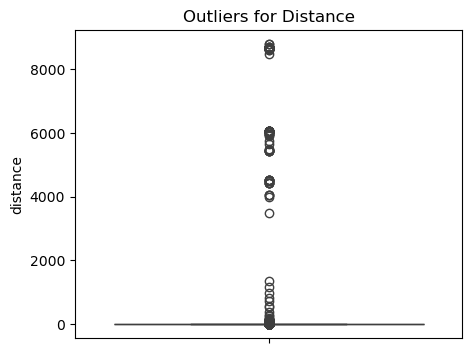

In [42]:
plt.figure(figsize = (5,4))
sns.boxplot(data['Distance_km'])
plt.ylabel('distance')
plt.title('Outliers for Distance')
plt.show()

- As we can see their are lot of outliers, so we will remove them

In [43]:
#First we will create a function of outlier removal
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [44]:
data = remove_outliers(data,['Distance_km'])

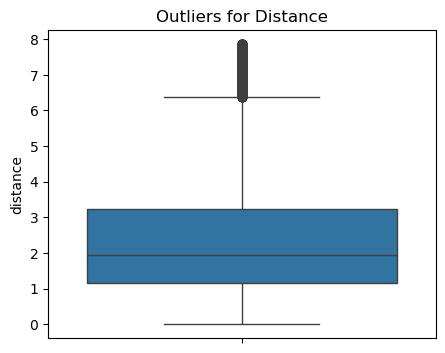

In [45]:
plt.figure(figsize = (5,4))
sns.boxplot(data['Distance_km'])
plt.ylabel('distance')
plt.title('Outliers for Distance')
plt.show()

In [46]:
data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,Distance_km,fare_amount,Time_of_day
0,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,1.681111,7.5,Evening
1,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,2.454363,7.7,Evening
2,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,5.039603,12.9,Night
3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,1.661442,5.3,Morning
4,-73.925023,40.744085,-73.973082,40.761247,5,3,8,28,2014,4.483730,16.0,Evening


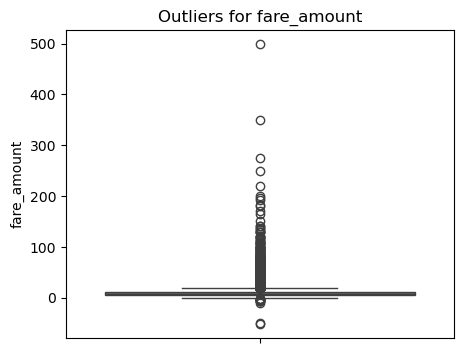

In [47]:
plt.figure(figsize = (5,4))
sns.boxplot(data['fare_amount'])
plt.ylabel('fare_amount')
plt.title('Outliers for fare_amount')
plt.show()

- We will remove outliers from fare-amount also

In [48]:
data = remove_outliers(data,['fare_amount'])

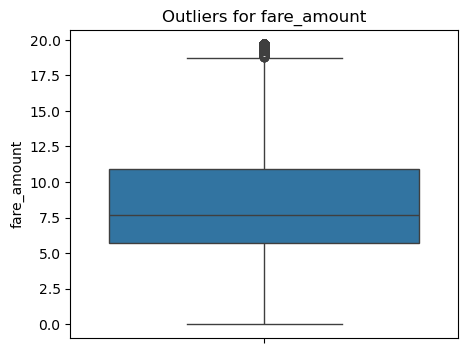

In [49]:
plt.figure(figsize = (5,4))
sns.boxplot(data['fare_amount'])
plt.ylabel('fare_amount')
plt.title('Outliers for fare_amount')
plt.show()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176130 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   176130 non-null  float64
 1   pickup_latitude    176130 non-null  float64
 2   dropoff_longitude  176130 non-null  float64
 3   dropoff_latitude   176130 non-null  float64
 4   passenger_count    176130 non-null  int64  
 5   weekday            176130 non-null  int32  
 6   Month              176130 non-null  int32  
 7   date               176130 non-null  int32  
 8   year               176130 non-null  int32  
 9   Distance_km        176130 non-null  float64
 10  fare_amount        176130 non-null  float64
 11  Time_of_day        176130 non-null  object 
dtypes: float64(6), int32(4), int64(1), object(1)
memory usage: 14.8+ MB


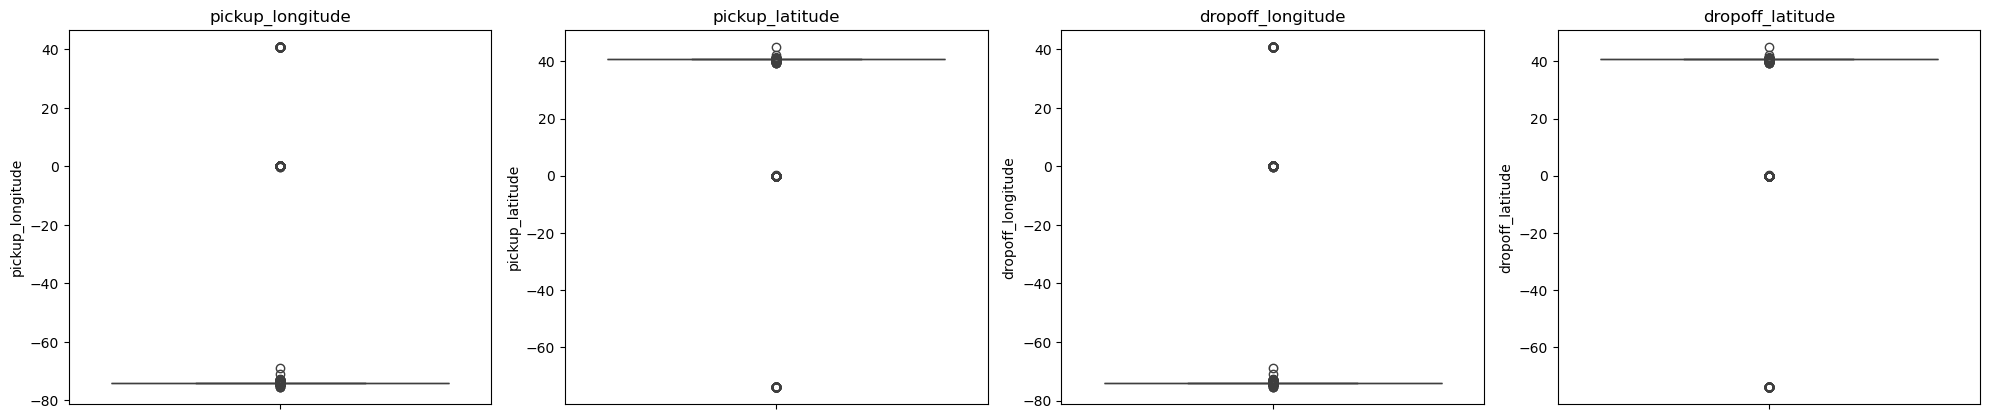

In [51]:
plt.figure(figsize = (20,20))

for i,variable in enumerate(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']):
    plt.subplot(5,4,i+1)
    sns.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [52]:
data = remove_outliers(data, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

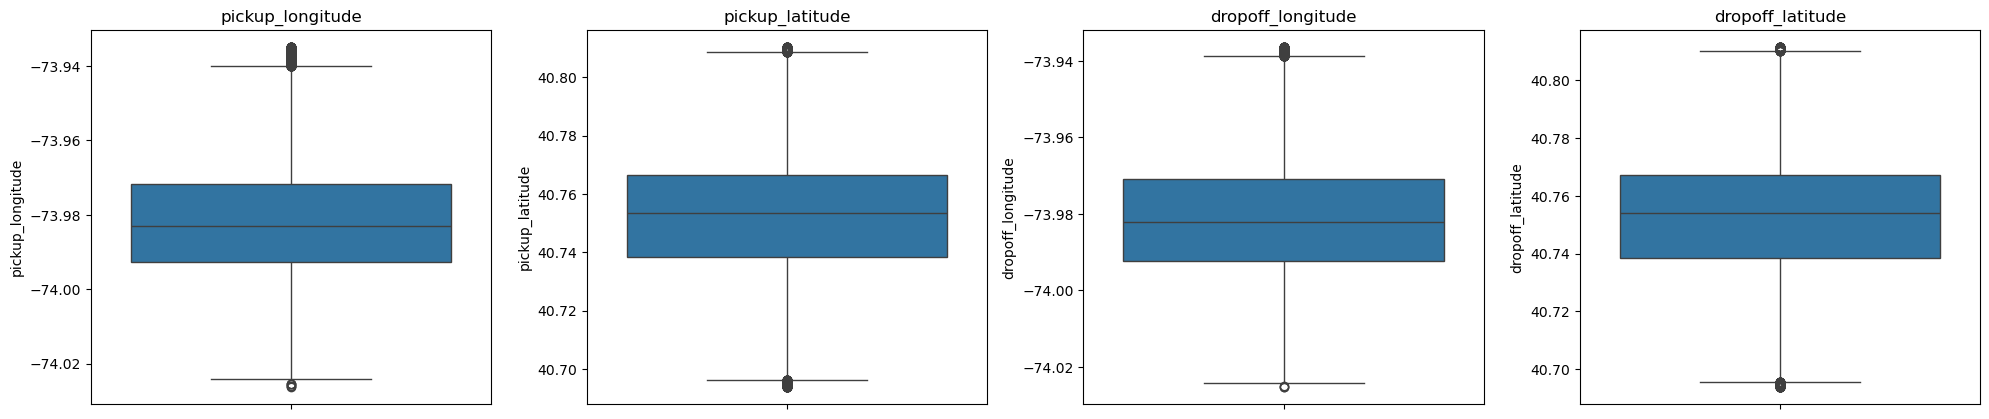

In [53]:
plt.figure(figsize = (20,20))

for i,variable in enumerate(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']):
    plt.subplot(5,4,i+1)
    sns.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162494 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   162494 non-null  float64
 1   pickup_latitude    162494 non-null  float64
 2   dropoff_longitude  162494 non-null  float64
 3   dropoff_latitude   162494 non-null  float64
 4   passenger_count    162494 non-null  int64  
 5   weekday            162494 non-null  int32  
 6   Month              162494 non-null  int32  
 7   date               162494 non-null  int32  
 8   year               162494 non-null  int32  
 9   Distance_km        162494 non-null  float64
 10  fare_amount        162494 non-null  float64
 11  Time_of_day        162494 non-null  object 
dtypes: float64(6), int32(4), int64(1), object(1)
memory usage: 13.6+ MB


In [55]:
data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,Month,date,year,Distance_km,fare_amount,Time_of_day
0,-73.999817,40.738354,-73.999512,40.723217,1,3,5,7,2015,1.681111,7.5,Evening
1,-73.994355,40.728225,-73.994710,40.750325,1,4,7,17,2009,2.454363,7.7,Evening
2,-74.005043,40.740770,-73.962565,40.772647,1,0,8,24,2009,5.039603,12.9,Night
3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,26,2009,1.661442,5.3,Morning
5,-73.969019,40.755910,-73.969019,40.755910,1,5,2,12,2011,0.000000,4.9,Early Morning


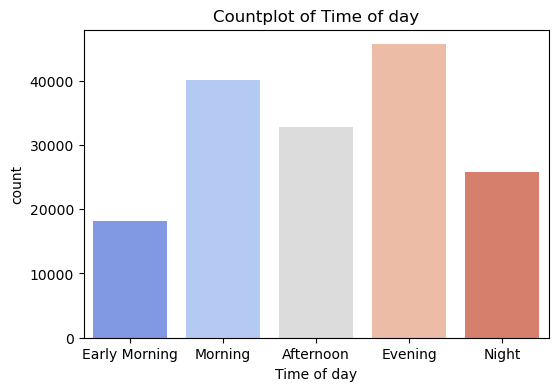

In [56]:
#creating countplot of time of the day
plt.figure(figsize = (6,4))
sns.countplot(x = 'Time_of_day',data = data,palette = 'coolwarm',order = ['Early Morning','Morning','Afternoon','Evening','Night'])
plt.title('Countplot of Time of day')
plt.xlabel('Time of day')
plt.ylabel('count')
plt.show()

## Simplifying Weekday,month and date

#### Weekdays of the Month

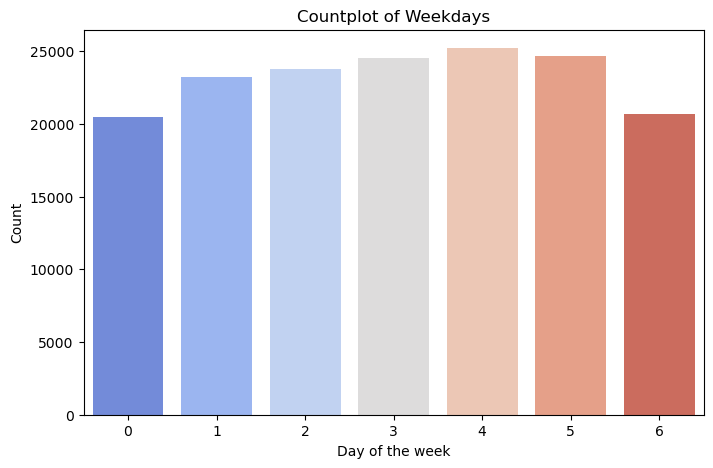

In [57]:
#creating countplot of days of the week
plt.figure(figsize = (8,5))
sns.countplot(x = 'weekday',data = data,palette = 'coolwarm')
plt.title('Countplot of Weekdays')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.show()

In [58]:
data['weekend'] = data['weekday'].isin([4,5,6]).astype(int)
data = data.drop('weekday',axis=1)

data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,date,year,Distance_km,fare_amount,Time_of_day,weekend
0,-73.999817,40.738354,-73.999512,40.723217,1,5,7,2015,1.681111,7.5,Evening,0
1,-73.994355,40.728225,-73.994710,40.750325,1,7,17,2009,2.454363,7.7,Evening,1
2,-74.005043,40.740770,-73.962565,40.772647,1,8,24,2009,5.039603,12.9,Night,0
3,-73.976124,40.790844,-73.965316,40.803349,3,6,26,2009,1.661442,5.3,Morning,1
5,-73.969019,40.755910,-73.969019,40.755910,1,2,12,2011,0.000000,4.9,Early Morning,1


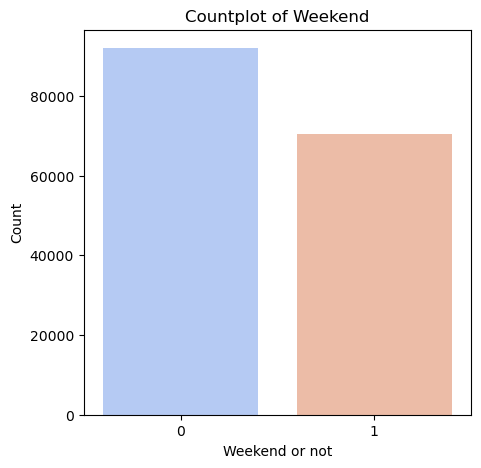

In [59]:
#creating countplot for count of weekends
plt.figure(figsize = (5,5))
sns.countplot(x = 'weekend',data = data,palette = 'coolwarm')
plt.title('Countplot of Weekend')
plt.xlabel('Weekend or not')
plt.ylabel('Count')
plt.show()

#### Days of the Month

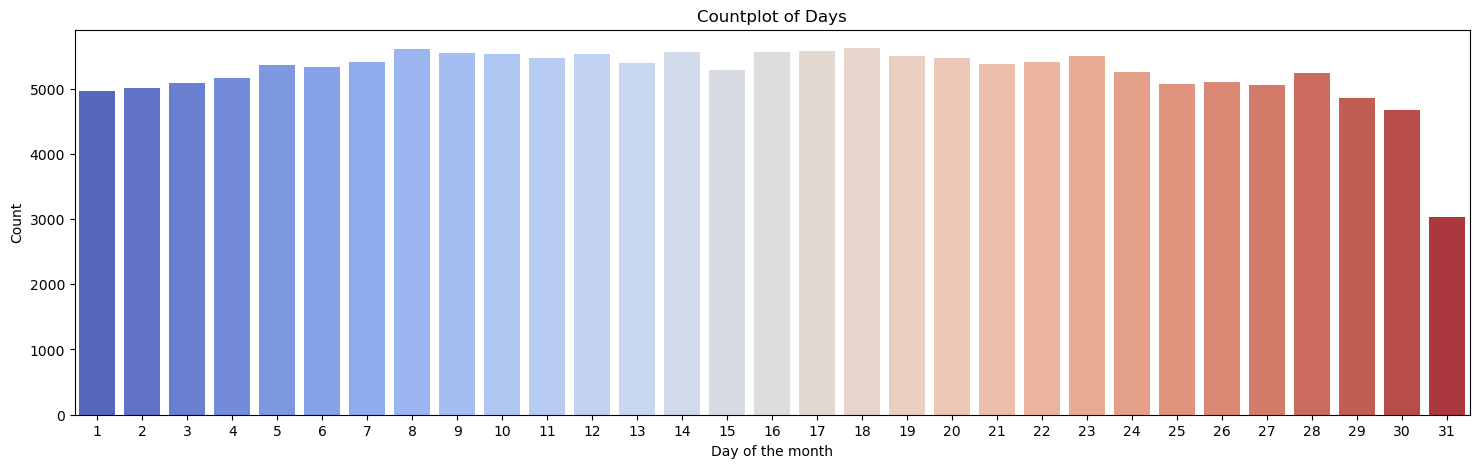

In [60]:
#creating countplot for days of the month
plt.figure(figsize = (18,5))
sns.countplot(x = 'date',data = data,palette = 'coolwarm')
plt.title('Countplot of Days')
plt.xlabel('Day of the month')
plt.ylabel('Count')
plt.show()

In [61]:
#Function to categorize days of the month
def categorize_date(date):
    if 0 <= date <= 10:
        return 'Early'
    elif 11 <= date <= 20:
        return 'Middle'
    elif 21 <= date <=31:
        return 'End'

#Apply the function to create new column 'Phase_of_month'
data['Phase_of_month'] = data['date'].apply(categorize_date)
data = data.drop('date',axis =1)

data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,year,Distance_km,fare_amount,Time_of_day,weekend,Phase_of_month
0,-73.999817,40.738354,-73.999512,40.723217,1,5,2015,1.681111,7.5,Evening,0,Early
1,-73.994355,40.728225,-73.994710,40.750325,1,7,2009,2.454363,7.7,Evening,1,Middle
2,-74.005043,40.740770,-73.962565,40.772647,1,8,2009,5.039603,12.9,Night,0,End
3,-73.976124,40.790844,-73.965316,40.803349,3,6,2009,1.661442,5.3,Morning,1,End
5,-73.969019,40.755910,-73.969019,40.755910,1,2,2011,0.000000,4.9,Early Morning,1,Middle


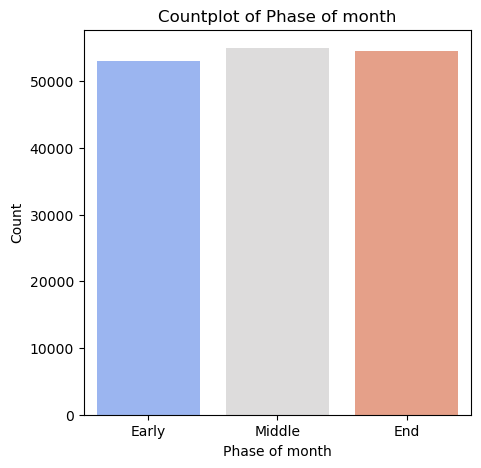

In [62]:
#creating countplot for phase of month
plt.figure(figsize = (5,5))
sns.countplot(x = 'Phase_of_month',data = data,palette = 'coolwarm')
plt.title('Countplot of Phase of month')
plt.xlabel('Phase of month')
plt.ylabel('Count')
plt.show()

#### Months of the year

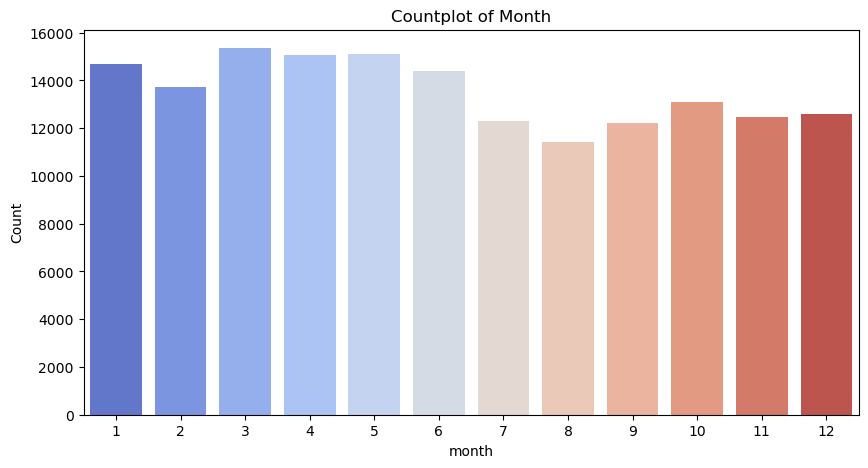

In [63]:
#creating countplot for days of the month
plt.figure(figsize = (10,5))
sns.countplot(x = 'Month',data = data,palette = 'coolwarm')
plt.title('Countplot of Month')
plt.xlabel('month')
plt.ylabel('Count')
plt.show()

In [64]:
#function to categorize month of the year
def categorize_month(Month):
    if 1 <= Month <= 3:
        return 1
    elif 4 <= Month <= 6:
        return 2
    elif 7 <= Month <= 9:
        return 3
    elif 10 <= Month <= 12:
        return 4

#apply the function to create new column 'year_quarter'
data['year_quarter'] = data['Month'].apply(categorize_month)
data = data.drop('Month',axis =1)

data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Distance_km,fare_amount,Time_of_day,weekend,Phase_of_month,year_quarter
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,1.681111,7.5,Evening,0,Early,2
1,-73.994355,40.728225,-73.994710,40.750325,1,2009,2.454363,7.7,Evening,1,Middle,3
2,-74.005043,40.740770,-73.962565,40.772647,1,2009,5.039603,12.9,Night,0,End,3
3,-73.976124,40.790844,-73.965316,40.803349,3,2009,1.661442,5.3,Morning,1,End,2
5,-73.969019,40.755910,-73.969019,40.755910,1,2011,0.000000,4.9,Early Morning,1,Middle,1


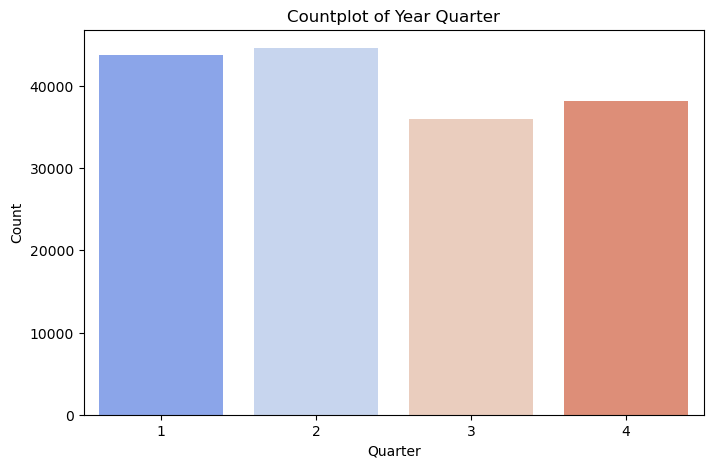

In [65]:
#creating countplot for quarter of the year
plt.figure(figsize = (8,5))
sns.countplot(x = 'year_quarter',data = data,palette = 'coolwarm')
plt.title('Countplot of Year Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

In [66]:
data = data[['year','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Time_of_day','weekend','year_quarter','Phase_of_month','Distance_km','fare_amount']]

data.head()

,year,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Time_of_day,weekend,year_quarter,Phase_of_month,Distance_km,fare_amount
0,2015,1,-73.999817,40.738354,-73.999512,40.723217,Evening,0,2,Early,1.681111,7.5
1,2009,1,-73.994355,40.728225,-73.994710,40.750325,Evening,1,3,Middle,2.454363,7.7
2,2009,1,-74.005043,40.740770,-73.962565,40.772647,Night,0,3,End,5.039603,12.9
3,2009,3,-73.976124,40.790844,-73.965316,40.803349,Morning,1,2,End,1.661442,5.3
5,2011,1,-73.969019,40.755910,-73.969019,40.755910,Early Morning,1,1,Middle,0.000000,4.9


##### Defining Categorical and Numerical features

In [67]:
cat_col = ['year','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Time_of_day','weekend','year_quarter','Phase_of_month']

num_col = ['Distance_km']

##### Encoding Categorical data

In [68]:
from sklearn.preprocessing import LabelEncoder

encoders = {} #Dictionary to save the encoders

for col in cat_col:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

data.head()

,year,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Time_of_day,weekend,year_quarter,Phase_of_month,Distance_km,fare_amount
0,6,0,11029,22163,11672,10920,2,0,1,0,1.681111,7.5
1,0,0,15874,13706,15866,34128,2,1,2,2,2.454363,7.7
2,0,0,6545,24446,46845,55933,4,0,2,1,5.039603,12.9
3,0,2,34705,67766,44721,72528,3,1,1,1,1.661442,5.3
5,2,0,41357,39104,41639,39750,1,1,0,2,0.000000,4.9


##### Standerdizing numerical data with Standard Scaler

In [69]:
#reshaping Distance_km into a 2D array
X = np.array(data['Distance_km'])

X_reshaped = X.reshape(-1, 1)

In [70]:
from sklearn.preprocessing import StandardScaler

scalers = {} #dictionary to save the scalers

for column in num_col:
    scaler = StandardScaler()
    data[column] = scaler.fit_transform(X_reshaped)
    scalers[column] = scaler

data.head()

,year,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Time_of_day,weekend,year_quarter,Phase_of_month,Distance_km,fare_amount
0,6,0,11029,22163,11672,10920,2,0,1,0,-0.391843,7.5
1,0,0,15874,13706,15866,34128,2,1,2,2,0.132993,7.7
2,0,0,6545,24446,46845,55933,4,0,2,1,1.887693,12.9
3,0,2,34705,67766,44721,72528,3,1,1,1,-0.405193,5.3
5,2,0,41357,39104,41639,39750,1,1,0,2,-1.532876,4.9


### Train Test Split

In [71]:
# selecting features and target
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

In [72]:
# splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Correlation Analysis

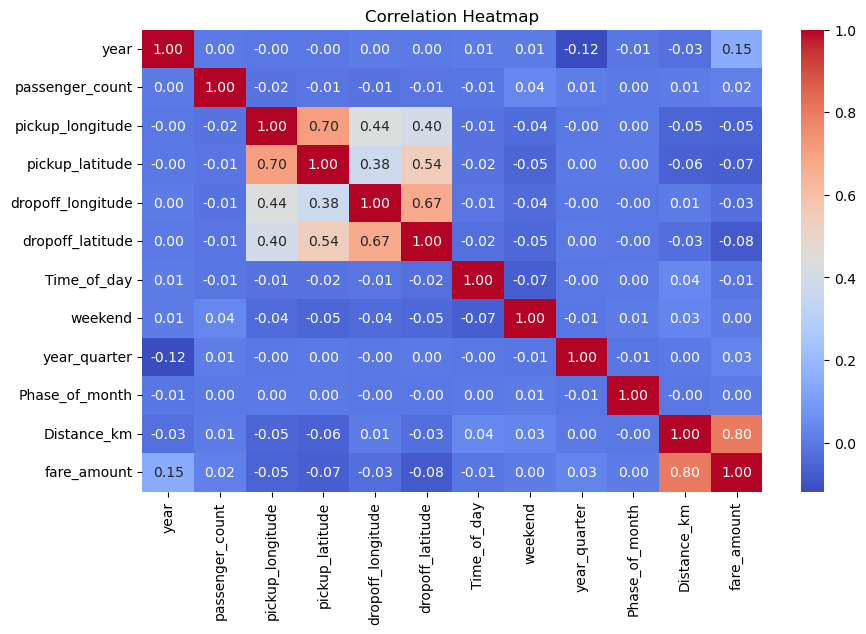

In [73]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

###### We will check for the Variance inflation factors of the features

In [74]:
#import necessary packages which are required
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [75]:
# Add a constant column for VIF calculation
X = add_constant(data)

In [76]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature        VIF
0               const  32.001889
1                year   1.112667
2     passenger_count   1.002136
3    pickup_longitude   2.207848
4     pickup_latitude   2.464371
5   dropoff_longitude   2.025766
6    dropoff_latitude   2.299483
7         Time_of_day   1.013831
8             weekend   1.013792
9        year_quarter   1.020819
10     Phase_of_month   1.000333
11        Distance_km   2.974623
12        fare_amount   3.050625


- Since the values of VIF of all the features are less than 5 so all the features are acceptable